<a href="https://colab.research.google.com/github/AeroZealous4/Sentiment-Analysis/blob/main/Sentiment_Analysis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
# input_dir="/content/drive/My Drive/deep_learning_assignment/training/data/"
dir_glove6B50d="/content/drive/My Drive/AML/Assignment 2/glove.6B/glove.6B.50d.txt"
dir_glove6B100d="/content/drive/My Drive/AML/Assignment 2/glove.6B/glove.6B.100d.txt"
dir_glove6B200d="/content/drive/My Drive/AML/Assignment 2/glove.6B/glove.6B.200d.txt"
dir_glove6B300d="/content/drive/My Drive/AML/Assignment 2/glove.6B/glove.6B.300d.txt"

dir_glove27B25d="/content/drive/My Drive/AML/Assignment 2/glove.twitter.27B/glove.twitter.27B.25d.txt"
dir_glove27B50d="/content/drive/My Drive/AML/Assignment 2/glove.twitter.27B/glove.twitter.27B.50d.txt"
dir_glove27B100d="/content/drive/My Drive/AML/Assignment 2/glove.twitter.27B/glove.twitter.27B.100d.txt"
dir_glove27B200d="/content/drive/My Drive/AML/Assignment 2/glove.twitter.27B/glove.twitter.27B.200d.txt"

Mounted at /content/drive


Cite:glove dataset: https://nlp.stanford.edu/projects/glove/
Code: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

# World Embedding
Analogy Tasks for glove 

Ref: Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014

In [ ]:
from numpy import linalg as LA
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

print("glove word embedding with 400000 word vectors and different dimensions")
# for dir_glove6B in [dir_glove27B25d,dir_glove6B50d,dir_glove27B50d,dir_glove6B100d,dir_glove27B100d, dir_glove6B200d, dir_glove27B200d, dir_glove6B300d]:

for dir_glove6B in [dir_glove27B25d,dir_glove27B50d,dir_glove27B100d,dir_glove27B200d]:
  
  # load the whole embedding into memory
  embeddings_index = dict()
  f = open(dir_glove6B)#'../glove_data/glove.6B/glove.6B.100d.txt')
  for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
  f.close()
  # print('Loaded %s word vectors.' % len(embeddings_index))

  # print((embeddings_index.get('word')).shape)
  # v(‘prince’) – v(‘boy’) + v(‘girl’)
  # A = embeddings_index.get('prince') - embeddings_index.get('boy') + embeddings_index.get('girl');
  # B = embeddings_index.get('princess')
  # print(dir_glove6B[-20:-3])
  # print(LA.norm((A-B),2))

  A = embeddings_index.get('king') - embeddings_index.get('men') + embeddings_index.get('woman');
  B = embeddings_index.get('queen')
  print(dir_glove6B[:])
  print(LA.norm((A-B),2))

glove word embedding with 400000 word vectors and different dimensions
/content/drive/My Drive/AML/Assignment 2/glove.twitter.27B/glove.twitter.27B.25d.txt
3.9629965
/content/drive/My Drive/AML/Assignment 2/glove.twitter.27B/glove.twitter.27B.50d.txt
5.118873
/content/drive/My Drive/AML/Assignment 2/glove.twitter.27B/glove.twitter.27B.100d.txt
6.0673065
/content/drive/My Drive/AML/Assignment 2/glove.twitter.27B/glove.twitter.27B.200d.txt
7.2013826


Sentiment Analysis LSTM Keras

Ref: https://github.com/hansmichaels/sentiment-analysis-IMDB-Review-using-LSTM/blob/master/sentiment_analysis.py.ipynb

In [ ]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

data = pd.read_csv('/content/drive/My Drive/AML/Assignment 2/IMDB Dataset.csv')

print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [ ]:

english_stops = set(stopwords.words('english'))

def load_dataset():
    df = pd.read_csv('/content/drive/My Drive/AML/Assignment 2/IMDB Dataset.csv')
    x_data = df['review']       # Reviews/Input
    y_data = df['sentiment']    # Sentiment/Output

    # PRE-PROCESS REVIEW
    x_data = x_data.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    x_data = x_data.apply(lambda review: [w.lower() for w in review.split()])   # lower case
    x_data = x_data.apply(lambda review: [w for w in review if w not in english_stops])  # remove stop words
    
    # ENCODE SENTIMENT -> 0 & 1
    y_data = y_data.replace('positive', 1)
    y_data = y_data.replace('negative', 0)

    return x_data, y_data

x_data, y_data = load_dataset()

print('Reviews')
print(x_data, '\n')
print('Sentiment')
print(y_data)

Reviews
0        [one, reviewers, mentioned, watching, oz, epis...
1        [wonderful, little, production, filming, techn...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [thought, movie, right, good, job, creative, o...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [going, disagree, previous, comment, side, mal...
49999    [one, expects, star, trek, movies, high, art, ...
Name: review, Length: 50000, dtype: object 

Sentiment
0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


In [ ]:
#Splitting Test and Train data set

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25)

print('Train Set')
print(x_train, '\n')
print(y_train, '\n')

print('Test Set')
print(x_test, '\n')
print(y_test, '\n')

print((x_train).shape, '\n')

Train Set
33152    [one, stupid, worthless, movies, ever, really,...
47362    [think, far, base, saying, possibly, worst, mo...
48438    [clever, overall, story, location, story, acti...
8785     [inspector, gadget, starring, matthew, broderi...
2025     [film, probably, worst, movie, watched, long, ...
                               ...                        
6017     [typical, goth, chick, rainbow, harvest, looki...
28732    [scarlet, coat, like, revolution, flicks, wasn...
44227    [germans, stand, open, get, mowed, machine, gu...
8002     [brilliant, film, next, best, film, drunken, m...
12530    [tedium, french, checked, watch, first, time, ...
Name: review, Length: 37500, dtype: object 

33152    0
47362    0
48438    0
8785     0
2025     0
        ..
6017     0
28732    1
44227    0
8002     1
12530    0
Name: sentiment, Length: 37500, dtype: int64 

Test Set
17698    [unlike, comments, mine, positive, movie, wrap...
23647    [stairway, heaven, outstanding, invention, mov...
4

In [ ]:
# Choose Max length for review 
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

# max_length = 200;
print("Length of review: ")
print(max_length)

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test  = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding
# vocab_size = len(t.word_index) + 1

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)
print(x_train.shape)

Length of review: 
118
Encoded X Train
 [[   3  243 3458 ...    0    0    0]
 [  26  116 2647 ...    0    0    0]
 [ 907  319   10 ...    0    0    0]
 ...
 [3105  649  685 ...    0    0    0]
 [ 373    2  250 ...    0    0    0]
 [8712  557 4493 ...    0    0    0]] 

Encoded X Test
 [[  884   657  1550 ...     0     0     0]
 [14956  1670  1224 ...     0     0     0]
 [    1   311  3064 ...     0     0     0]
 ...
 [24855 21882 11455 ...     0     0     0]
 [  291    11     1 ...     0     0     0]
 [   12   170   125 ...     0     0     0]] 

Maximum review length:  118
(37500, 118)


In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

# load the whole embedding into memory
embeddings_index = dict()
f = open(dir_glove6B100d)#'../glove_data/glove.6B/glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((total_words, 100))
for word, i in token.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


In [ ]:
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding


# ARCHITECTURE
EMBED_DIM = 100
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, weights=[embedding_matrix], input_length = max_length , trainable=True))
model.add(LSTM(LSTM_OUT, return_sequences=True))
model.add(LSTM(LSTM_OUT))
# gru = tf.keras.layers.GRU(LSTM_OUT)
# model.add(layers.GRU((LSTM_OUT)));#, return_sequences=True))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 118, 100)          8987900   
_________________________________________________________________
lstm (LSTM)                  (None, 118, 64)           42240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 9,063,229
Trainable params: 9,063,229
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Training

checkpoint = ModelCheckpoint(
    'models/LSTM.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)


history = model.fit(x_train, y_train,validation_data= (x_test,y_test), batch_size = 128, epochs = 20, callbacks=[checkpoint])


Epoch 1/20
293/293 [==============================] - ETA: 0s - loss: 0.6274 - accuracy: 0.6501
Epoch 00001: accuracy improved from -inf to 0.65005, saving model to models/LSTM.h5
293/293 [==============================] - 33s 113ms/step - loss: 0.6274 - accuracy: 0.6501 - val_loss: 0.6362 - val_accuracy: 0.6481
Epoch 2/20
293/293 [==============================] - ETA: 0s - loss: 0.6078 - accuracy: 0.6864
Epoch 00002: accuracy improved from 0.65005 to 0.68637, saving model to models/LSTM.h5
293/293 [==============================] - 32s 111ms/step - loss: 0.6078 - accuracy: 0.6864 - val_loss: 0.5010 - val_accuracy: 0.7935
Epoch 3/20
293/293 [==============================] - ETA: 0s - loss: 0.3604 - accuracy: 0.8525
Epoch 00003: accuracy improved from 0.68637 to 0.85251, saving model to models/LSTM.h5
293/293 [==============================] - 32s 111ms/step - loss: 0.3604 - accuracy: 0.8525 - val_loss: 0.3013 - val_accuracy: 0.8738
Epoch 4/20
293/293 [==============================] 

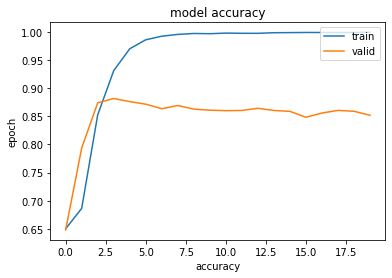

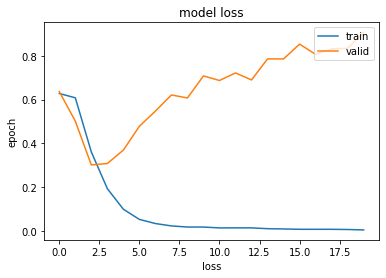

In [ ]:
#Code is taken from previous assignment
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel("accuracy")
plt.ylabel("epoch")
plt.legend(['train','valid'],loc='upper right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.xlabel("loss")
plt.ylabel("epoch")
plt.legend(['train','valid'],loc='upper right')
plt.show()

In [ ]:
model.save('/content/drive/My Drive/AML/Assignment 2/LSTM_Model1')

y_pred = model.predict_classes(x_test, batch_size = 128)

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/AML/Assignment 2/LSTM_Model1/assets
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Correct Prediction: 10647
Wrong Prediction: 1853
Accuracy: 85.176


In [ ]:
##Sentiment Analysis on custom review
from tensorflow import keras
loaded_model = keras.models.load_model('/content/drive/My Drive/AML/Assignment 2/LSTM_Model1')
# loaded_model = load_model('models/LSTM.h5')
review = str(input('Movie Review: '))


# Pre-process input
regex = re.compile(r'[^a-zA-Z\s]')
review = regex.sub('', review)
print('Cleaned: ', review)

words = review.split(' ')
filtered = [w for w in words if w not in english_stops]
filtered = ' '.join(filtered)
filtered = [filtered.lower()]

print('Filtered: ', filtered)


tokenize_words = token.texts_to_sequences(filtered)
tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')
print(tokenize_words)

result = loaded_model.predict(tokenize_words)
print(result)

if result >= 0.5:
    print('positive')
else:
    print('negative')

Movie Review: I am not sure about this movies.
Cleaned:  I am not sure about this movies
Filtered:  ['i sure movies']
[[139  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]]
[[0.5176944]]
positive


In [ ]:
#Sentiment Analysis on other dataset Netflix
# Data Taken from https://github.com/artem-oppermann/Sentiment-Analysis-of-Netflix-Reviews/tree/master/data/preprocessed

data = pd.read_csv('/content/drive/My Drive/AML/Assignment 2/Netflix_DataSet.csv')
print(data)

english_stops = set(stopwords.words('english'))

def load_dataset2():
    df = pd.read_csv('/content/drive/My Drive/AML/Assignment 2/Netflix_DataSet.csv')
    x_data = df['review']       # Reviews/Input
    y_data = df['sentiment']    # Sentiment/Output

    # PRE-PROCESS REVIEW
    x_data = x_data.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    x_data = x_data.apply(lambda review: [w.lower() for w in review.split()])   # lower case
    x_data = x_data.apply(lambda review: [w for w in review if w not in english_stops])  # remove stop words
    
    # ENCODE SENTIMENT -> 0 & 1
    # y_data = y_data.replace('positive', 1)
    # y_data = y_data.replace('negative', 0)

    return x_data, y_data

x_data2, y_data2 = load_dataset2()

x_data2 = token.texts_to_sequences(x_data2)
x_data2 = pad_sequences(x_data2, maxlen=max_length, padding='post', truncating='post')
# x_test  = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

print('Reviews')
print(x_data2, '\n')
print('Sentiment')
print(y_data2)

                                                  review  sentiment
0                       a small movie with a big impact           1
1      deliberately and skillfully uses ambiguity to ...          1
2      poetry in motion captured on film while it can...          1
3      basically a static series of semi improvised a...          0
4      will assuredly rank as one of the cleverest mo...          1
...                                                  ...        ...
10657  it s usually a bad sign when directors abandon...          1
10658                       the gags are often a stitch           1
10659  it s as if de palma spent an hour setting a fa...          0
10660  just the labour involved in creating the layer...          1
10661  one of the most exciting action films to come ...          1

[10662 rows x 2 columns]
Reviews
[[  267     1    91 ...     0     0     0]
 [ 4205  8348   939 ...     0     0     0]
 [ 3725  1146  1669 ...     0     0     0]
 ...
 [  765  5520   

In [ ]:
y_pred = loaded_model.predict_classes(x_data2, batch_size = 128)

true = 0
for i, y in enumerate(y_data2):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

Correct Prediction: 7635
Wrong Prediction: 3027
Accuracy: 71.60945413618458


Netflix Analysis

Correct Prediction: 7394
Wrong Prediction: 3268
Accuracy: 69.3490902269743